# Website Ad-Clicks Prediction with Deployment

*Author: Amitesh Tripathi & Sayali Lad*


## Table of Contents


1. Importing libraries
2. Importing and exploring the dataset
3. Data Pre-processing and Feature Engineering
4. Exploratory Data Analysis (EDA)
5. Feature Selection & Feature Scaling
6. Data Modeling
7. Model Evaluation
8. Conclusion
9. Reference


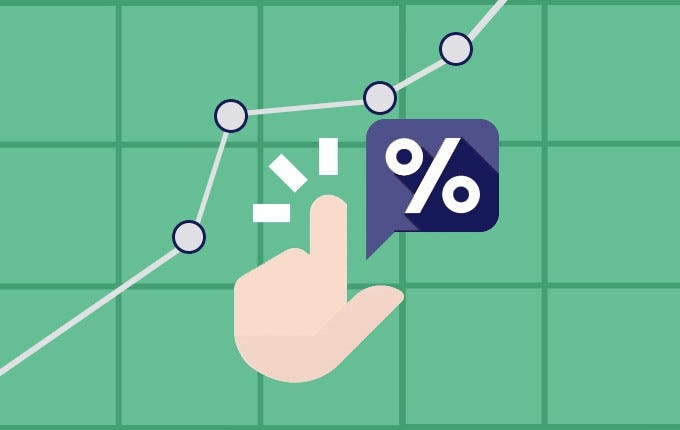

># **1- Importing necessary libraries**
---

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

># **2- Importing and Exploring the dataset**
---

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Ad_click_prediction_train (1).csv to Ad_click_prediction_train (1).csv


In [ ]:
df = pd.read_csv("Ad_click_prediction_train (1).csv")

In [ ]:
df.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0


In [ ]:
df.shape

(463291, 15)

In [ ]:
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
tab_info

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
column type,int64,object,int64,object,int64,int64,int64,float64,float64,object,float64,float64,float64,int64,int64
null values (nb),0,0,0,0,0,0,0,365854,18243,18243,18243,18243,125129,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.96851,3.937698,3.937698,3.937698,3.937698,27.008727,0.0,0.0


># **3- Data Pre-processing and Feature Engineering**
---

In [ ]:
df.drop(labels='product_category_2', axis=1, inplace=True)

In [ ]:
sum(df['is_click'] == 1)

31331

In [ ]:
num_missing = df['city_development_index'].isnull().sum()
if num_missing > 0:
    missing_indices = df['city_development_index'].isnull()
    num_missing_values = num_missing
    replace_values = np.random.choice([1, 2, 3,4], size=num_missing_values, p=[0.25, 0.25,0.25,0.25])
    df['city_development_index'][missing_indices] = replace_values

In [ ]:
df.isna().sum()

session_id                    0
DateTime                      0
user_id                       0
product                       0
campaign_id                   0
webpage_id                    0
product_category_1            0
user_group_id             18243
gender                    18243
age_level                 18243
user_depth                18243
city_development_index        0
var_1                         0
is_click                      0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

session_id                0
DateTime                  0
user_id                   0
product                   0
campaign_id               0
webpage_id                0
product_category_1        0
user_group_id             0
gender                    0
age_level                 0
user_depth                0
city_development_index    0
var_1                     0
is_click                  0
dtype: int64

In [ ]:
sum(df['is_click'] == 1)

30057

In [ ]:
df.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,8.0,Female,2.0,2.0,3.0,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,8.0,Female,2.0,2.0,1.0,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,2.0,Male,2.0,3.0,2.0,1,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['gender'] = LE.fit_transform(df['gender'])
df['product'] = LE.fit_transform(df['product'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 445048 entries, 0 to 463290
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   session_id              445048 non-null  int64  
 1   DateTime                445048 non-null  object 
 2   user_id                 445048 non-null  int64  
 3   product                 445048 non-null  int64  
 4   campaign_id             445048 non-null  int64  
 5   webpage_id              445048 non-null  int64  
 6   product_category_1      445048 non-null  int64  
 7   user_group_id           445048 non-null  float64
 8   gender                  445048 non-null  int64  
 9   age_level               445048 non-null  float64
 10  user_depth              445048 non-null  float64
 11  city_development_index  445048 non-null  float64
 12  var_1                   445048 non-null  int64  
 13  is_click                445048 non-null  int64  
dtypes: float64(4), int64

In [ ]:
df

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,2,359520,13787,4,10.0,0,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,2,105960,11085,5,8.0,0,2.0,2.0,3.0,0,0
2,129781,2017-07-02 00:00,243253,2,359520,13787,4,8.0,0,2.0,2.0,1.0,0,0
3,464848,2017-07-02 00:00,1097446,8,359520,13787,3,3.0,1,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,2,405490,60305,3,2.0,1,2.0,3.0,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463286,583588,2017-07-07 23:59,572718,7,118601,28529,5,4.0,1,4.0,3.0,2.0,0,0
463287,198389,2017-07-07 23:59,130461,8,118601,28529,4,10.0,0,4.0,3.0,2.0,1,0
463288,563423,2017-07-07 23:59,306241,3,118601,28529,4,2.0,1,2.0,3.0,1.0,0,0
463289,595571,2017-07-07 23:59,306241,3,118601,28529,5,2.0,1,2.0,3.0,2.0,0,0


In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['DateTime'] = df['DateTime'].dt.hour

#df['day_of_week'] = df['DateTime'].dt.dayofweek
#df['hour_of_day'] = df['DateTime'].dt.hour

In [ ]:
df.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,0,858557,2,359520,13787,4,10.0,0,4.0,3.0,3.0,0,0
1,333291,0,243253,2,105960,11085,5,8.0,0,2.0,2.0,3.0,0,0
2,129781,0,243253,2,359520,13787,4,8.0,0,2.0,2.0,1.0,0,0
3,464848,0,1097446,8,359520,13787,3,3.0,1,3.0,3.0,2.0,1,0
4,90569,0,663656,2,405490,60305,3,2.0,1,2.0,3.0,2.0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 445048 entries, 0 to 463290
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   session_id              445048 non-null  int64  
 1   DateTime                445048 non-null  int64  
 2   user_id                 445048 non-null  int64  
 3   product                 445048 non-null  int64  
 4   campaign_id             445048 non-null  int64  
 5   webpage_id              445048 non-null  int64  
 6   product_category_1      445048 non-null  int64  
 7   user_group_id           445048 non-null  float64
 8   gender                  445048 non-null  int64  
 9   age_level               445048 non-null  float64
 10  user_depth              445048 non-null  float64
 11  city_development_index  445048 non-null  float64
 12  var_1                   445048 non-null  int64  
 13  is_click                445048 non-null  int64  
dtypes: float64(4), int64

In [ ]:
df.nunique()

session_id                445048
DateTime                      24
user_id                   143837
product                       10
campaign_id                   10
webpage_id                     9
product_category_1             5
user_group_id                 13
gender                         2
age_level                      7
user_depth                     3
city_development_index         4
var_1                          2
is_click                       2
dtype: int64

In [ ]:
print("not click：", df.loc[df['is_click']==0].shape[0])
print("clicked：", df.loc[df['is_click']==1].shape[0])

not click： 414991
clicked： 30057


In [ ]:
user_ctr = df.groupby('user_id')['is_click'].agg(['count', 'sum'])
user_ctr['avg_ctr'] = user_ctr['sum'] / user_ctr['count']
user_ctr = user_ctr.reset_index()

# Merge the average CTR back to the main dataset
df = df.merge(user_ctr[['user_id', 'avg_ctr']], on='user_id', how='left')
df.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click,avg_ctr
0,140690,0,858557,2,359520,13787,4,10.0,0,4.0,3.0,3.0,0,0,0.000000
1,333291,0,243253,2,105960,11085,5,8.0,0,2.0,2.0,3.0,0,0,0.000000
2,129781,0,243253,2,359520,13787,4,8.0,0,2.0,2.0,1.0,0,0,0.000000
3,464848,0,1097446,8,359520,13787,3,3.0,1,3.0,3.0,2.0,1,0,0.000000
4,90569,0,663656,2,405490,60305,3,2.0,1,2.0,3.0,2.0,1,0,0.181818


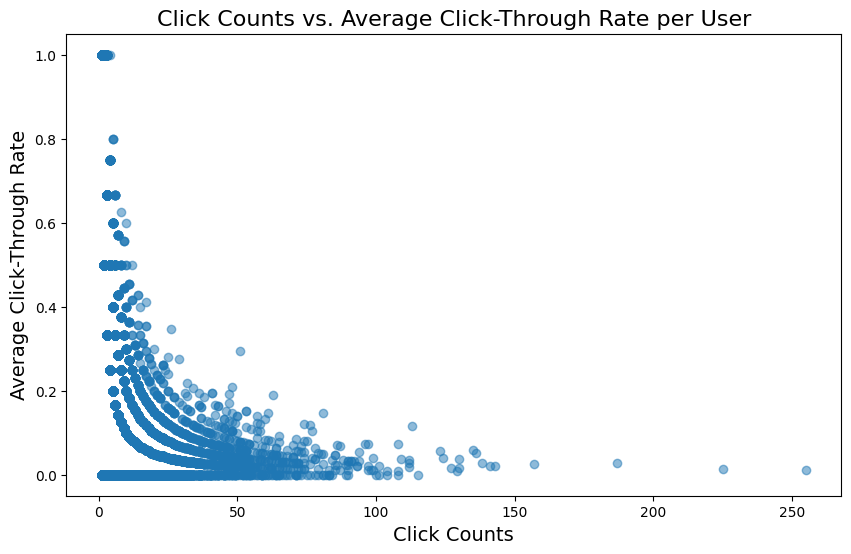

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of count vs. avg_ctr
plt.figure(figsize=(10, 6))
plt.scatter(user_ctr['count'], user_ctr['avg_ctr'], alpha=0.5)

# Customize the plot
plt.title('Click Counts vs. Average Click-Through Rate per User', fontsize=16)
plt.xlabel('Click Counts', fontsize=14)
plt.ylabel('Average Click-Through Rate', fontsize=14)

# Show the plot
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Separate features and target variable
X = df.drop(columns=['is_click'])
y = df['is_click']

# Create a random forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Train the classifier
rf_clf.fit(X, y)

# Identify the most important features
selector = SelectFromModel(rf_clf, prefit=True)
X_selected = selector.transform(X)

# Get the names of the selected features
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['session_id', 'DateTime', 'user_id', 'avg_ctr'], dtype='object')


># **4- Exploratory Data Analysis**
---

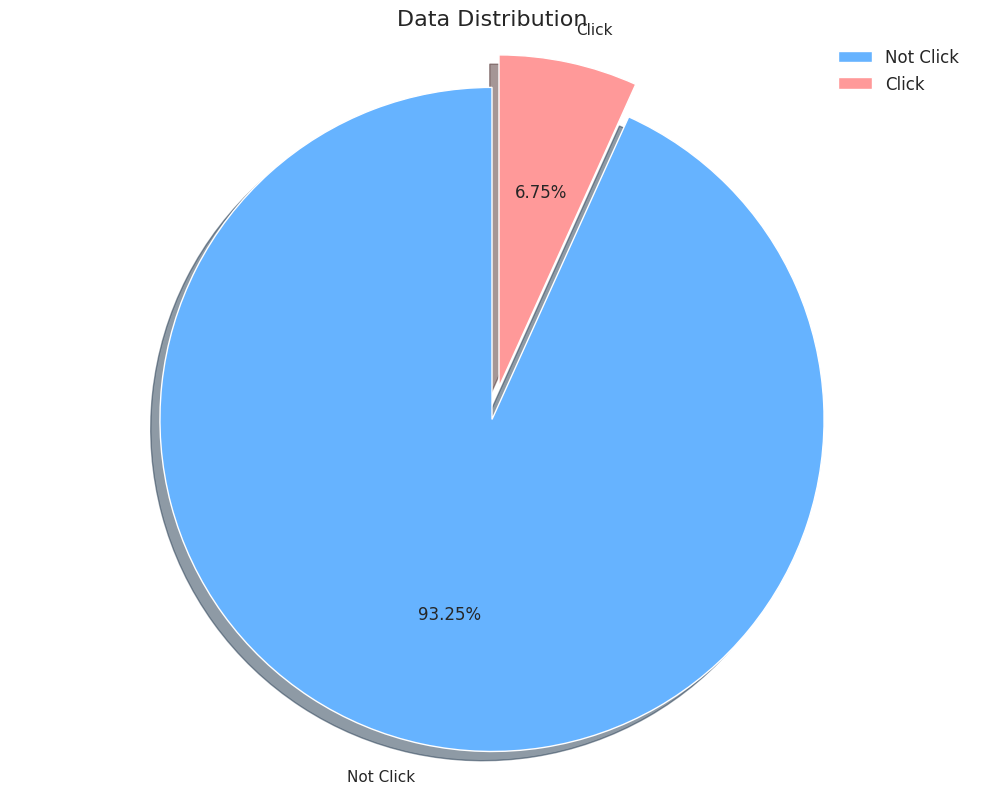

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = ['Not Click', 'Click']
size = df['is_click'].value_counts()
colors = ['#66b3ff', '#ff9999']
explode = [0, 0.1]
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True, autopct='%.2f%%', startangle=90)
plt.axis('equal') 
plt.title("Data Distribution", fontsize=16)
plt.legend(frameon=False, fontsize=12, loc='upper right')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


In [ ]:
columns_scatter_plot = df[['user_id','product','product_category_1','user_group_id','age_level','user_depth','city_development_index']]
type(columns_scatter_plot)

pandas.core.frame.DataFrame

In [ ]:
columns = columns_scatter_plot.columns
type(columns)

pandas.core.indexes.base.Index

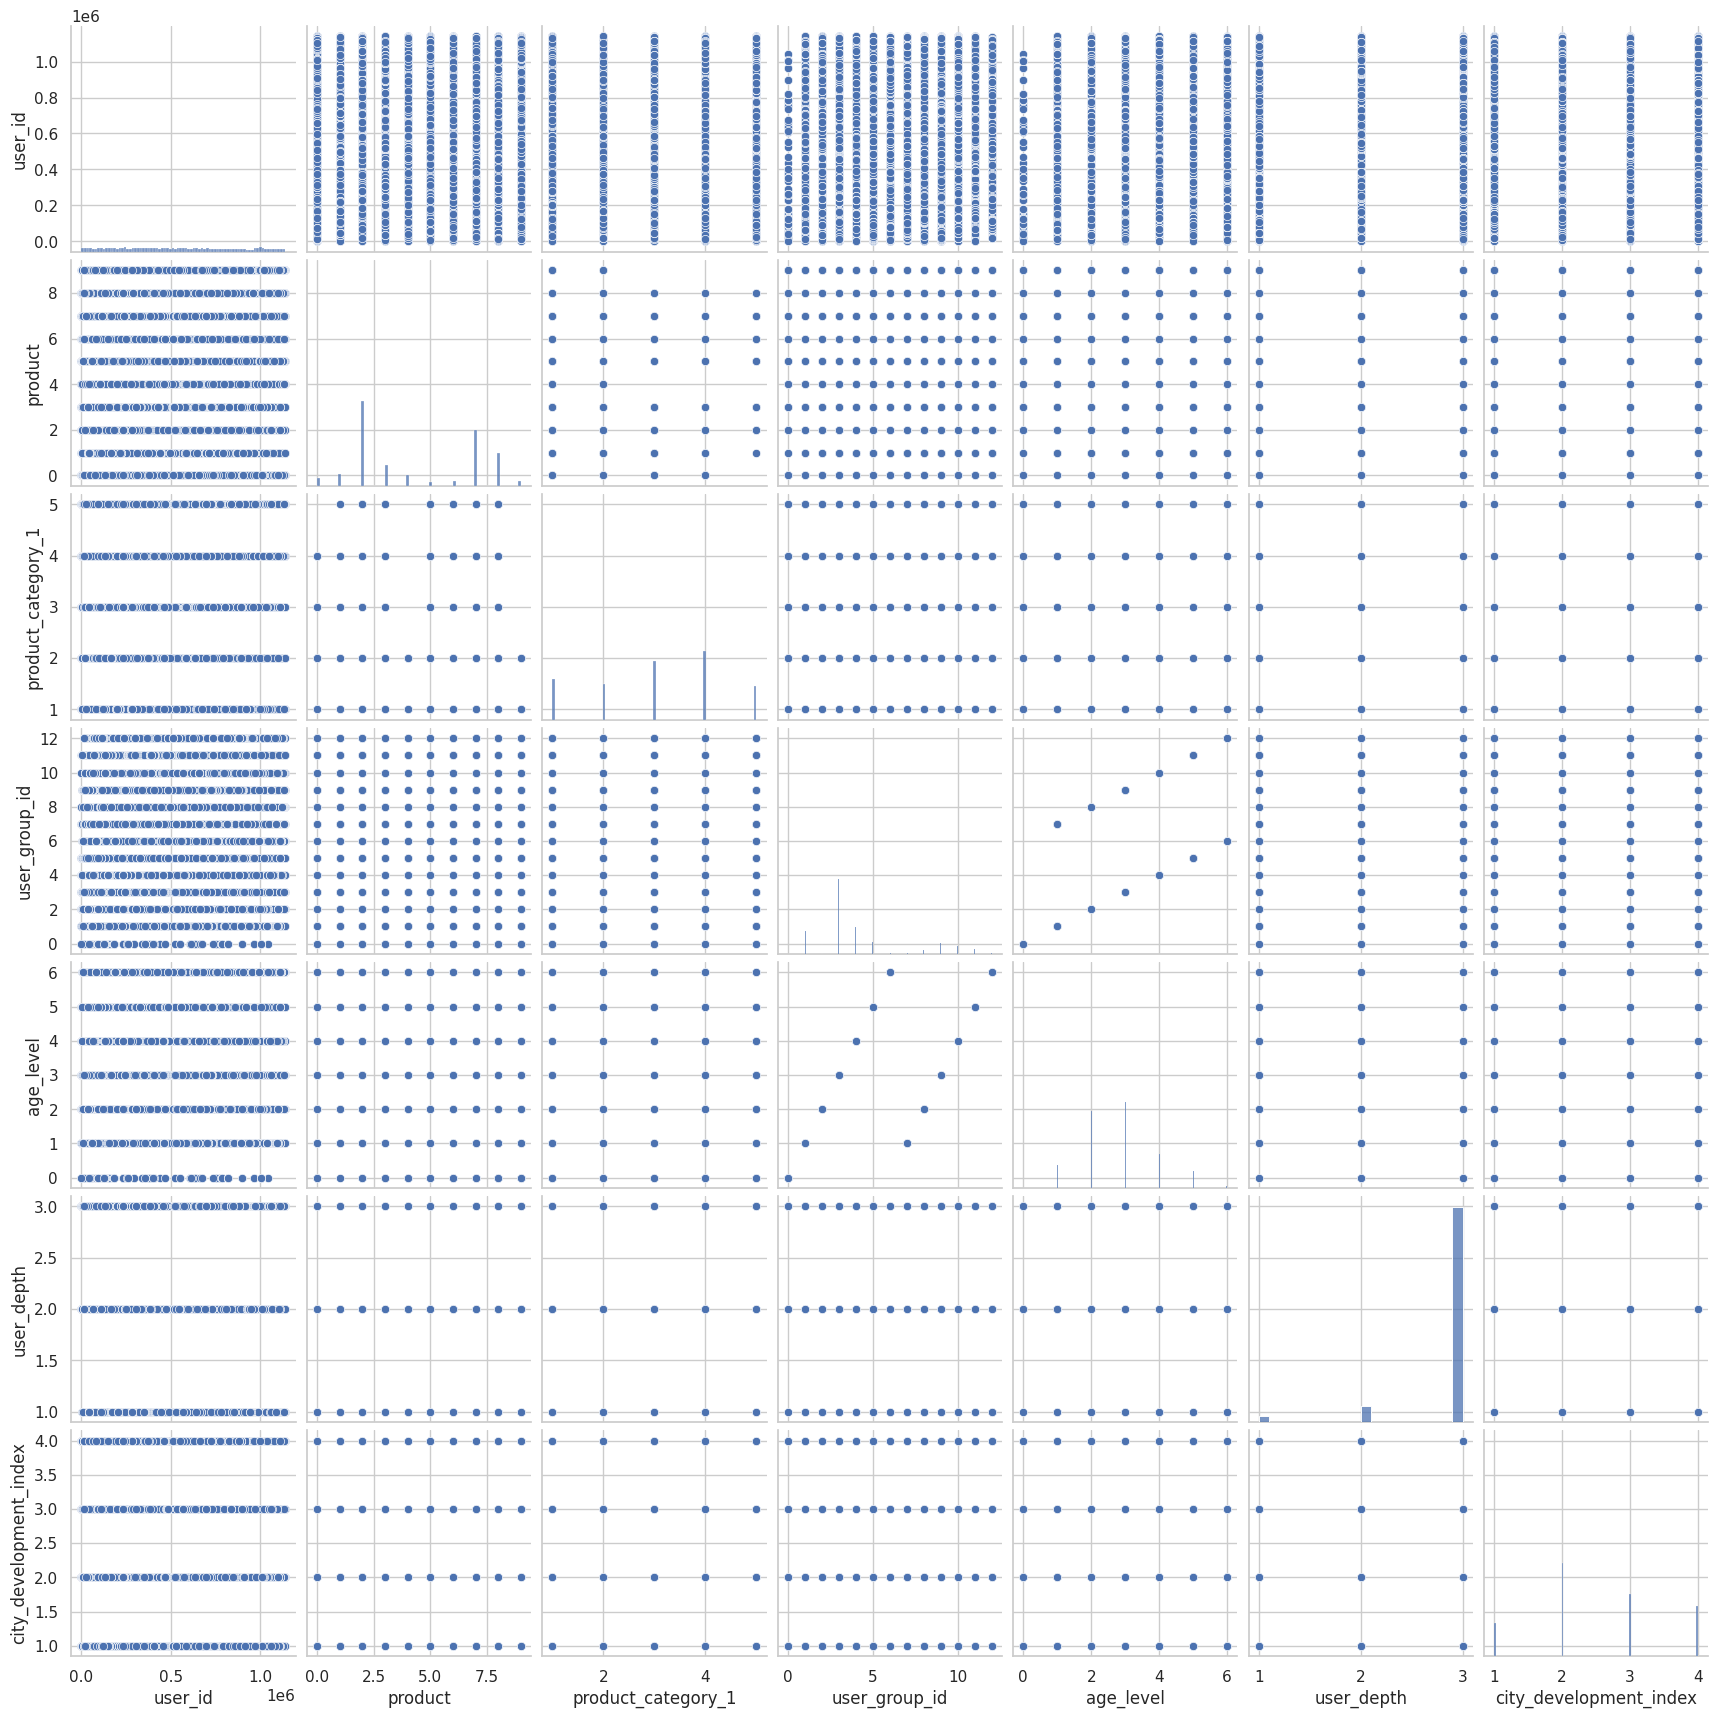

In [ ]:
# Create the scatter plot matrix
sns.pairplot(columns_scatter_plot[columns])

# Show the plot
plt.show()


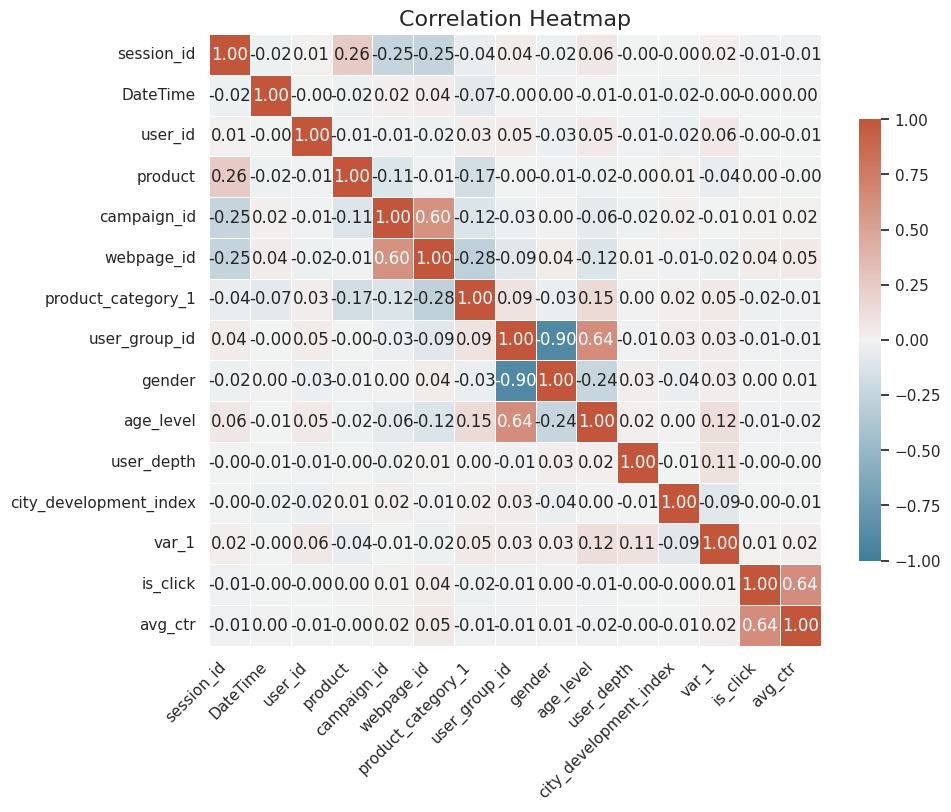

In [ ]:
plt.figure(figsize=(10, 10))
sns.set(style="white")

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), cmap=cmap, annot=True, fmt='.2f', vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

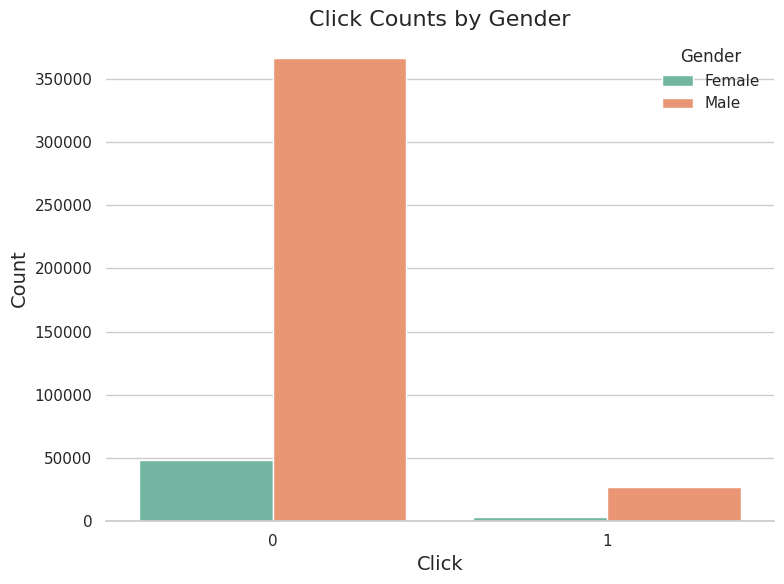

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map numeric gender values to string representations
df['gender_str'] = df['gender'].map({0: 'Female', 1: 'Male'})

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

sns.countplot(x='is_click', hue='gender_str', data=df, palette='Set2')

# Customize the plot
plt.title('Click Counts by Gender', fontsize=16)
plt.xlabel('Click', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Customize the legend
leg = plt.legend(title='Gender', title_fontsize=12, frameon=False)
for text in leg.get_lines():
    text.set_linestyle("-")
    text.set_linewidth(1.5)

sns.despine(left=True)
plt.tight_layout()
plt.show()


Male click rate: 6.79%
Female click rate: 6.44%


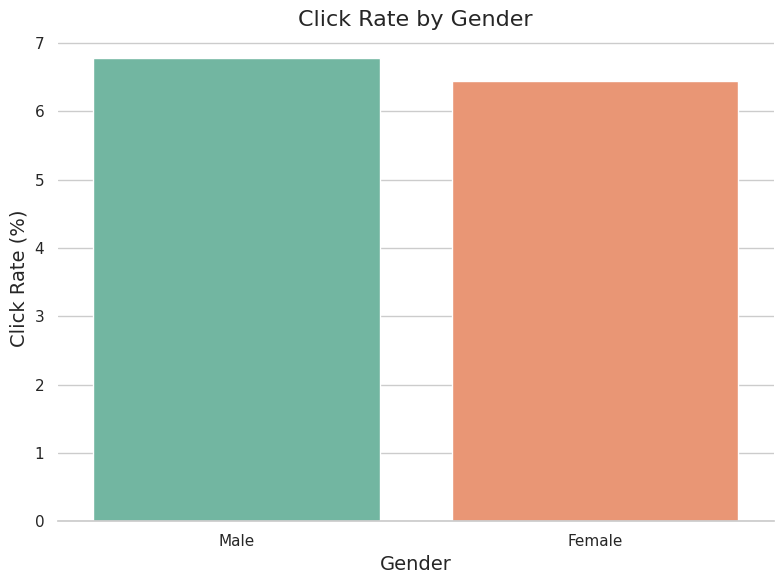

In [ ]:
Male = df[df['gender']==1]
Female = df[df['gender']==0]

# Calculate click rates
male_click_rate = round(100 * sum(Male['is_click'] == 1) / Male.shape[0], 2)
female_click_rate = round(100 * sum(Female['is_click'] == 1) / Female.shape[0], 2)

# Print click rates
print(f"Male click rate: {male_click_rate}%")
print(f"Female click rate: {female_click_rate}%")

# Create a DataFrame for visualization
click_rates = pd.DataFrame({'Gender': ['Male', 'Female'], 'Click Rate': [male_click_rate, female_click_rate]})

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

sns.barplot(x='Gender', y='Click Rate', data=click_rates, palette='Set2')

# Customize the plot
plt.title('Click Rate by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Click Rate (%)', fontsize=14)

sns.despine(left=True)
plt.tight_layout()
plt.show()


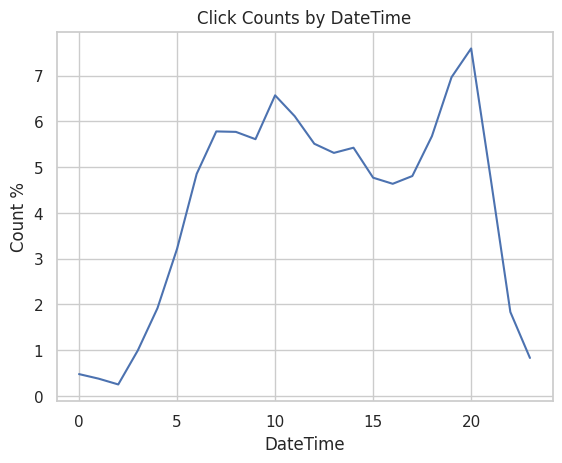

In [ ]:
Is_clicked = df[df['is_click']==1]
Is_clicked_hour = Is_clicked.groupby('DateTime').agg('sum').reset_index()
Is_clicked_hour['is_click'] = 100*Is_clicked_hour['is_click']/sum(Is_clicked_hour['is_click'])
Is_clicked_hour

sns.lineplot(x='DateTime',
             y='is_click', 
             data=Is_clicked_hour, 
             palette='Set2')

plt.title('Click Counts by DateTime')
plt.xlabel('DateTime')
plt.ylabel('Count %')

plt.show()


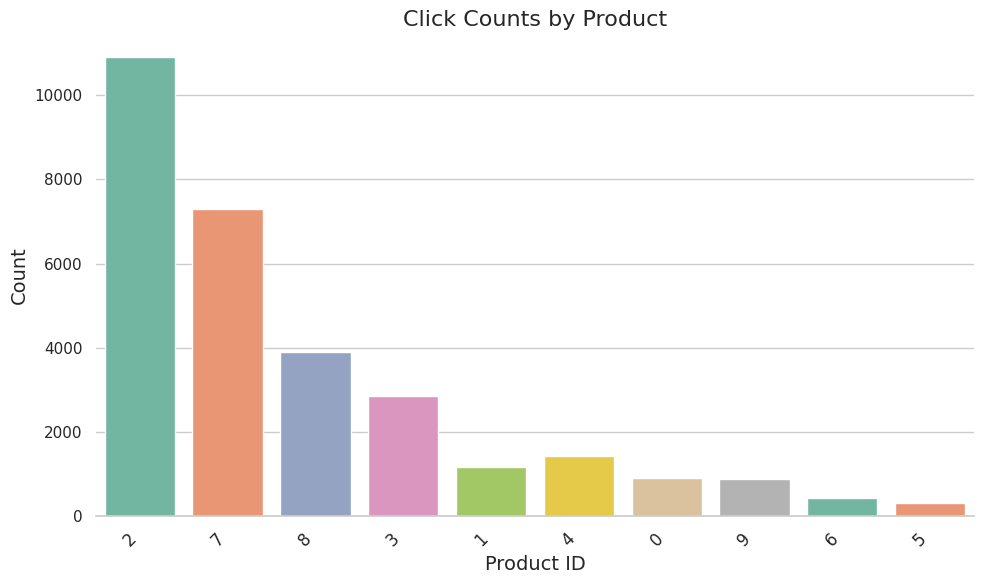

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.countplot(x='product', data=df[df['is_click'] == 1], palette='Set2', order=df['product'].value_counts().index)

# Customize the plot
plt.title('Click Counts by Product', fontsize=16)
plt.xlabel('Product ID', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Customize the x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=12)

sns.despine(left=True)
plt.tight_layout()
plt.show()


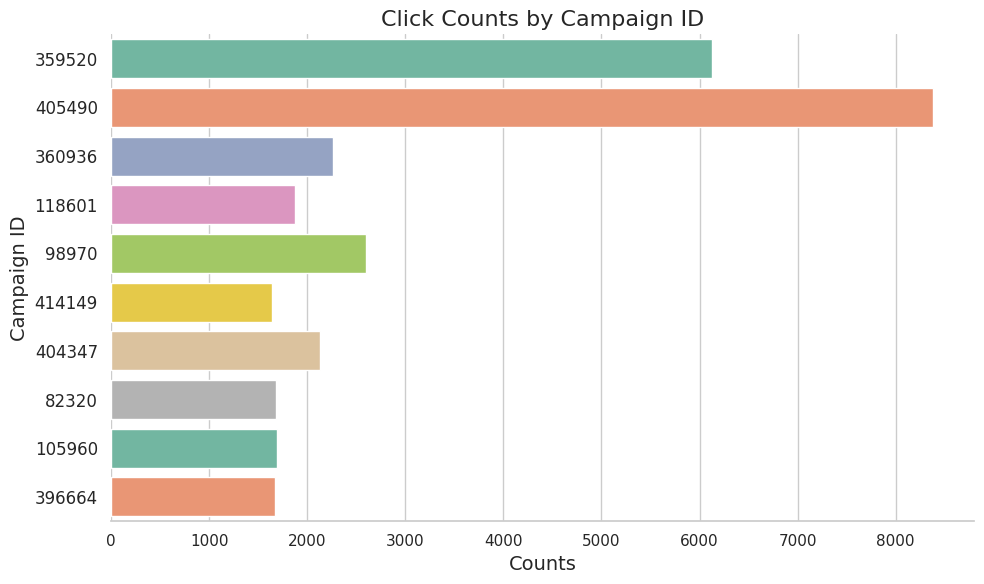

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.countplot(y='campaign_id', data=df[df['is_click'] == 1], palette='Set2', order=df['campaign_id'].value_counts().index)

# Customize the plot
plt.title('Click Counts by Campaign ID', fontsize=16)
plt.xlabel('Counts', fontsize=14)
plt.ylabel('Campaign ID', fontsize=14)

# Customize the y-axis labels
plt.yticks(fontsize=12)

sns.despine(left=True)
plt.tight_layout()
plt.show()


># **5- Feature Selection & Feature Scaling**
---

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = df.drop('gender_str', axis=1)
df.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click,avg_ctr
0,140690,0,858557,2,359520,13787,4,10.0,0,4.0,3.0,3.0,0,0,0.000000
1,333291,0,243253,2,105960,11085,5,8.0,0,2.0,2.0,2.0,0,0,0.000000
2,129781,0,243253,2,359520,13787,4,8.0,0,2.0,2.0,2.0,0,0,0.000000
3,464848,0,1097446,8,359520,13787,3,3.0,1,3.0,3.0,2.0,1,0,0.000000
4,90569,0,663656,2,405490,60305,3,2.0,1,2.0,3.0,2.0,1,0,0.181818


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Steps 1 and 2: Sampling and preparing the feature matrix and target vector
df_sampled = df.groupby('is_click').apply(lambda x: x.sample(n=7000 if x.name == 1 else 20000)).reset_index(drop=True)
x = df_sampled.drop(['is_click','session_id'],axis=1)
y = df_sampled['is_click']

# Step 3: Splitting the data into train and test sets
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x, y, test_size=0.3, shuffle=True)

# Step 4: Standardizing the feature matrix using the training set and transforming both the training and test sets
scaler = StandardScaler()
x_train_1 = scaler.fit_transform(x_train_1)
x_test_1 = scaler.transform(x_test_1)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Steps 1 and 2: Sampling and preparing the feature matrix and target vector
df_2 = df.sample(n=30000)
x = df_2.drop(['is_click','session_id'],axis=1)
y = df_2['is_click']

# Step 3: Splitting the data into train and test sets
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x, y, test_size=0.3, shuffle=True)

# Step 4: Standardizing the feature matrix using the training set and transforming both the training and test sets
scaler = StandardScaler()
x_train_2 = scaler.fit_transform(x_train_2)
x_test_2 = scaler.transform(x_test_2)

# Step 5: Applying SMOTE to handle class imbalance
sm = SMOTE(random_state=2)
x_train_2, y_train_2 = sm.fit_resample(x_train_2, y_train_2)


In [ ]:
pd.Series(y_train_2).value_counts()

1    19611
0    19611
Name: is_click, dtype: int64

In [ ]:
pd.Series(y_test_2).value_counts()

0    8378
1     622
Name: is_click, dtype: int64

In [ ]:
x_train_2.shape

(39222, 13)

In [ ]:
x_test_2.shape

(9000, 13)

># **6- Data Modelling**
---

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import SGDClassifier    
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC                      
from sklearn.tree import DecisionTreeClassifier     
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV    
from sklearn.model_selection import StratifiedKFold 
from collections import Counter

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier                   

classifiers = {
    
    'LogisticRegression':LogisticRegression(),                               
    "KNN":KNeighborsClassifier(),              
    'DT':DecisionTreeClassifier(),             
    'RFC':RandomForestClassifier(),            
    'Bagging':BaggingClassifier(),             
    'SGD':SGDClassifier(),                     
    'GBC':GradientBoostingClassifier(),        
    'xgb':XGBClassifier()                      
}

In [ ]:
def accuracy_score(X_train, y_train):
    for key, classifier in classifiers.items():
        classifier.fit(X_train, y_train)
        training_score = cross_val_score(classifier, X_train, y_train, cv=5) 
        print("Classifier Name : ", classifier.__class__.__name__,"  Training Score ：", round(training_score.mean(), 2)*100,'%')

In [ ]:
accuracy_score(x_train_1, y_train_1)

Classifier Name :  LogisticRegression   Training Score ： 87.0 %
Classifier Name :  KNeighborsClassifier   Training Score ： 85.0 %
Classifier Name :  DecisionTreeClassifier   Training Score ： 83.0 %
Classifier Name :  RandomForestClassifier   Training Score ： 87.0 %
Classifier Name :  BaggingClassifier   Training Score ： 85.0 %
Classifier Name :  SGDClassifier   Training Score ： 88.0 %
Classifier Name :  GradientBoostingClassifier   Training Score ： 88.0 %
Classifier Name :  XGBClassifier   Training Score ： 86.0 %


In [ ]:
accuracy_score(x_train_2, y_train_2)

Classifier Name :  LogisticRegression   Training Score ： 87.0 %
Classifier Name :  KNeighborsClassifier   Training Score ： 94.0 %
Classifier Name :  DecisionTreeClassifier   Training Score ： 94.0 %
Classifier Name :  RandomForestClassifier   Training Score ： 97.0 %
Classifier Name :  BaggingClassifier   Training Score ： 96.0 %
Classifier Name :  SGDClassifier   Training Score ： 87.0 %
Classifier Name :  GradientBoostingClassifier   Training Score ： 94.0 %
Classifier Name :  XGBClassifier   Training Score ： 96.0 %


In [ ]:
def LR_gs(X_train, y_train):
    # LR
    LR_param = {
        'penalty':['l1', 'l2'],
        'C':[0.001, 0.01, 0.1, 1, 10]
    }

    LR_gs = GridSearchCV(LogisticRegression(),param_grid=LR_param, n_jobs=-1, scoring='accuracy')
    LR_gs.fit(X_train, y_train)

    LR_estimators = LR_gs.best_estimator_ 
    
    return LR_estimators
def KNN_gs(X_train, y_train):
    KNN_param = {
        'n_neighbors':list(range(2, 5, 1)),
        'algorithm':['auto','ball_tree','kd_tree','brute']
    }

    KNN_gs = GridSearchCV(KNeighborsClassifier(), param_grid=KNN_param, n_jobs=-1, scoring='accuracy')
    KNN_gs.fit(X_train, y_train)

    KNN_estimators = KNN_gs.best_estimator_ 
    
    return KNN_estimators
def SVC_gs(X_train, y_train):
    SVC_param = {
        'C':[0.5, 0.7, 0.9, 1],
        'kernel':['rfb', 'sigmod','poly']
    }

    SVC_gs = GridSearchCV(SVC(), param_grid=SVC_param, n_jobs=-1, scoring='accuracy')
    SVC_gs.fit(X_train, y_train)

    SVC_estimators = SVC_gs.best_estimator_ 
    
    return SVC_estimators
def DT_gs(X_train, y_train):
    DT_param = {
        'criterion':['gini', 'entropy'], 
        'max_depth':list(range(2, 5, 1)),
        'min_samples_leaf':list(range(3, 7, 1)) 
    }

    DT_gs = GridSearchCV(DecisionTreeClassifier(), param_grid=DT_param, n_jobs=-1, scoring='accuracy')
    DT_gs.fit(X_train, y_train)

    DT_estimators = DT_gs.best_estimator_ 
    
    return DT_estimators
def RFC_gs(X_train, y_train):
    RFC_param = {
        'n_estimators':[100, 150, 200], 
        'criterion':['gini', 'entropy'], 
        'max_depth':list(range(2,5,1)), 
    }
    
    RFC_gs = GridSearchCV(RandomForestClassifier(), param_grid=RFC_param, n_jobs=-1, scoring='accuracy')
    RFC_gs.fit(X_train, y_train)
    
    RFC_estimators = RFC_gs.best_estimator_
    
    return RFC_estimators
def BAG_gs(X_train, y_train):
    BAG_param = {
        'n_estimators':[10, 15, 20]
    }
    
    BAG_gs = GridSearchCV(BaggingClassifier(), param_grid=BAG_param, n_jobs=-1, scoring='accuracy')
    BAG_gs.fit(X_train, y_train)
    
    BAG_estimators = BAG_gs.best_estimator_
    
    return BAG_estimators
def SGD_gs(X_train, y_train):
    SGD_param = {
        'penalty':['l2','l1'],
        'max_iter':[1000, 1500, 2000]
    }
    
    SGD_gs = GridSearchCV(SGDClassifier(), param_grid=SGD_param, n_jobs=-1, scoring='accuracy')
    SGD_gs.fit(X_train, y_train)
    
    SGD_estimators = SGD_gs.best_estimator_
    
    return SGD_estimators
def XGB_gs(X_train, y_train):
    XGB_param = {
        'max_depth':[3,4,5,6]
    }
    
    XGB_gs = GridSearchCV(XGBClassifier(), param_grid=XGB_param, n_jobs=-1, scoring='accuracy')
    XGB_gs.fit(X_train, y_train)
    
    XGB_estimators = XGB_gs.best_estimator_
    
    return XGB_estimators

In [ ]:
LR_best_estimator = LR_gs(x_train_1,y_train_1)

KNN_best_estimator = KNN_gs(x_train_1,y_train_1)

SVC_best_estimator = SVC_gs(x_train_1,y_train_1)

DT_best_estimator = DT_gs(x_train_1,y_train_1)

RFC_best_estimator = RFC_gs(x_train_1,y_train_1)

BAG_best_estimator = BAG_gs(x_train_1,y_train_1)

SGD_best_estimator = SGD_gs(x_train_1,y_train_1)

XGB_best_estimator = XGB_gs(x_train_1,y_train_1)

In [ ]:
LR_best_estimator = LR_gs(x_train_2,y_train_2)

KNN_best_estimator = KNN_gs(x_train_2,y_train_2)

SVC_best_estimator = SVC_gs(x_train_2,y_train_2)

DT_best_estimator = DT_gs(x_train_2,y_train_2)

RFC_best_estimator = RFC_gs(x_train_2,y_train_2)

BAG_best_estimator = BAG_gs(x_train_2,y_train_2)

SGD_best_estimator = SGD_gs(x_train_2,y_train_2)

XGB_best_estimator = XGB_gs(x_train_2,y_train_2)

># **7- Model Evaluation**
---

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

result_df1 = pd.DataFrame(columns=['Accuracy', 'F1-score', 'Recall', 'Precision', 'AUC_ROC'],
                         index=['LR','KNN','DT','RFC','Bagging','SGD','XGB'])
def caculate(models, X_test, y_test):
 
    accuracy_results = []
    F1_score_results = []
    Recall_results = []
    Precision_results = []
    AUC_ROC_results = []
    
    for model in models:
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred) 
        precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)
        AUC_ROC = roc_auc_score(y_test, y_pred) # AUC
        
        
        accuracy_results.append(accuracy)
        F1_score_results.append(f1_score)
        Recall_results.append(recall)
        AUC_ROC_results.append(AUC_ROC)
        Precision_results.append(precision)
    return accuracy_results, F1_score_results, Recall_results, AUC_ROC_results, Precision_results


In [ ]:
best_models = [LR_best_estimator, KNN_best_estimator, DT_best_estimator, RFC_best_estimator,
               BAG_best_estimator, SGD_best_estimator, XGB_best_estimator]
accuracy_results, F1_score_results, Recall_results, AUC_ROC_results, Precision_results = caculate(best_models,x_test_1,y_test_1)
result_df1['Accuracy'] = accuracy_results
result_df1['F1-score'] = F1_score_results
result_df1['Recall'] = Recall_results
result_df1['Precision'] = Precision_results
result_df1['AUC_ROC'] = AUC_ROC_results
result_df1

,Accuracy,F1-score,Recall,Precision,AUC_ROC
LR,0.865309,"[0.913157685266258, 0.7000274951883421]","[0.9608040201005025, 0.5976525821596245]","[0.8700136508418019, 0.8447246184472462]",0.779228
KNN,0.795802,"[0.8760863050644292, 0.42005610098176716]","[0.9793969849246231, 0.2812206572769953]","[0.7924911900243968, 0.8296398891966759]",0.630309
DT,0.874074,"[0.9121900826446281, 0.7774869109947644]","[0.8874371859296483, 0.8366197183098592]","[0.9383634431455898, 0.726161369193154]",0.862028
RFC,0.862963,"[0.9032426778242677, 0.765228426395939]","[0.8678391959798994, 0.8492957746478873]","[0.9416575790621592, 0.6963048498845266]",0.858567
Bagging,0.864691,"[0.9061483130673061, 0.7576293675364884]","[0.8862646566164154, 0.8042253521126761]","[0.9269446391030133, 0.7161371237458194]",0.845245
SGD,0.873210,"[0.9169429842296806, 0.7322033898305085]","[0.9495812395309883, 0.6591549295774648]","[0.8864738076622362, 0.8234604105571848]",0.804368
XGB,0.800123,"[0.844789569552296, 0.719362107817646]","[0.7380234505862646, 0.9741784037558685]","[0.9876709258013898, 0.5702115965924704]",0.856101


In [ ]:
best_models = [LR_best_estimator, KNN_best_estimator,  DT_best_estimator, RFC_best_estimator,
               BAG_best_estimator, SGD_best_estimator, XGB_best_estimator]
result_df2 = pd.DataFrame(columns=['Accuracy', 'F1-score', 'Recall', 'Precision', 'AUC_ROC'],
                         index=['LR','KNN','DT','RFC','Bagging','SGD','XGB'])
accuracy_results, F1_score_results, Recall_results, AUC_ROC_results, Precision_results = caculate(best_models,x_test_2,y_test_2)
result_df2['Accuracy'] = accuracy_results
result_df2['F1-score'] = F1_score_results
result_df2['Recall'] = Recall_results
result_df2['Precision'] = Precision_results
result_df2['AUC_ROC'] = AUC_ROC_results
result_df2

,Accuracy,F1-score,Recall,Precision,AUC_ROC
LR,0.894444,"[0.9407139291063406, 0.5192307692307692]","[0.8996180472666507, 0.8247588424437299]","[0.9857441799633796, 0.378877400295421]",0.862188
KNN,0.922444,"[0.9581835609872993, 0.46636085626911317]","[0.9545237526856052, 0.4903536977491961]","[0.9618715419773876, 0.4446064139941691]",0.722439
DT,0.844000,"[0.9095360824742268, 0.43387096774193545]","[0.8424444974934352, 0.864951768488746]","[0.9882385886306356, 0.28955866523143164]",0.853698
RFC,0.844000,"[0.909126213592233, 0.44941176470588234]","[0.8382668894724278, 0.9212218649517685]","[0.9930712669683258, 0.2971991701244813]",0.879744
Bagging,0.924667,"[0.9595561918396563, 0.4514563106796116]","[0.9600143232275006, 0.44855305466237944]","[0.9590984974958264, 0.4543973941368078]",0.704284
SGD,0.877444,"[0.9302825358700462, 0.49380449747590643]","[0.8783719264740988, 0.864951768488746]","[0.988714228133817, 0.3455362877328195]",0.871662
XGB,0.940444,"[0.9683065279091769, 0.5073529411764706]","[0.9773215564573884, 0.4437299035369775]","[0.9594562924771503, 0.592274678111588]",0.710526


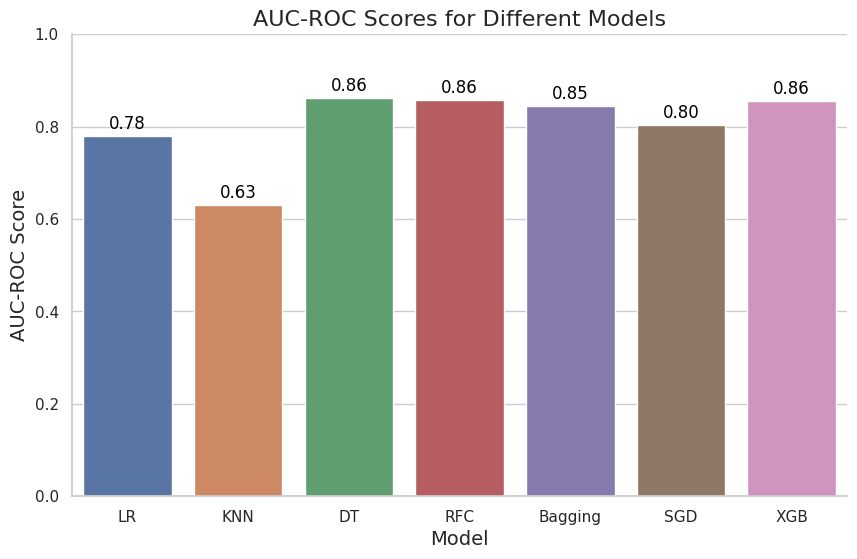

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style and size
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create the barplot
ax = sns.barplot(data=result_df1, x=result_df1.index, y='AUC_ROC')

# Customize the plot
plt.title('AUC-ROC Scores for Different Models', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('AUC-ROC Score', fontsize=14)

# Customize the y-axis ticks
ax.set_ylim([0, 1])

# Annotate the bars with the AUC-ROC scores
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.2f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='baseline',
        fontsize=12, color='black',
        xytext=(0, 5),
        textcoords='offset points'
    )

# Remove the top and right spines
sns.despine(top=True, right=True)

# Show the plot
plt.show()


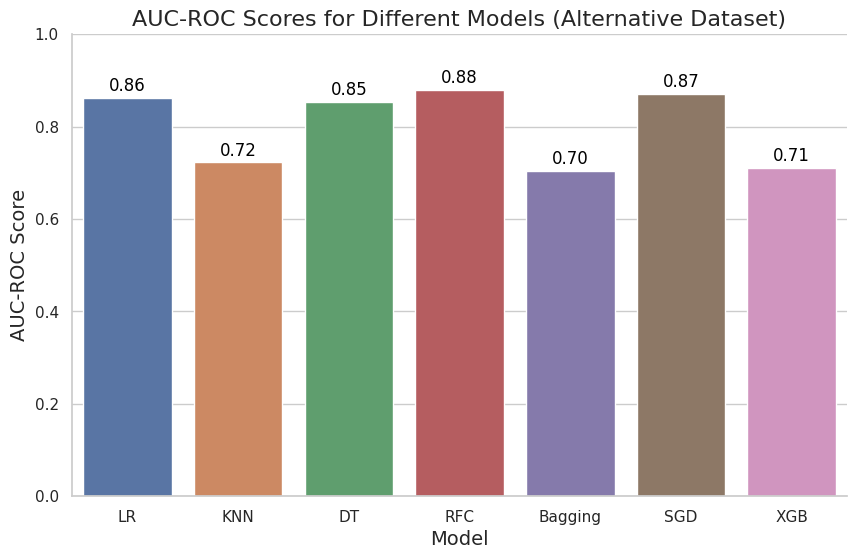

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style and size
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create the barplot
ax = sns.barplot(data=result_df2, x=result_df2.index, y='AUC_ROC')

# Customize the plot
plt.title('AUC-ROC Scores for Different Models (Alternative Dataset)', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('AUC-ROC Score', fontsize=14)

# Customize the y-axis ticks
ax.set_ylim([0, 1])

# Annotate the bars with the AUC-ROC scores
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.2f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='baseline',
        fontsize=12, color='black',
        xytext=(0, 5),
        textcoords='offset points'
    )

# Remove the top and right spines
sns.despine(top=True, right=True)

# Show the plot
plt.show()


In [ ]:
top_3_classifier_1 = result_df1.sort_values('AUC_ROC',ascending = False)[:3]
top_3_classifier_1

,Accuracy,F1-score,Recall,Precision,AUC_ROC
DT,0.874074,"[0.9121900826446281, 0.7774869109947644]","[0.8874371859296483, 0.8366197183098592]","[0.9383634431455898, 0.726161369193154]",0.862028
RFC,0.862963,"[0.9032426778242677, 0.765228426395939]","[0.8678391959798994, 0.8492957746478873]","[0.9416575790621592, 0.6963048498845266]",0.858567
XGB,0.800123,"[0.844789569552296, 0.719362107817646]","[0.7380234505862646, 0.9741784037558685]","[0.9876709258013898, 0.5702115965924704]",0.856101


In [ ]:
top_3_classifier_2 = result_df2.sort_values('AUC_ROC',ascending = False)[:3]
top_3_classifier_2

,Accuracy,F1-score,Recall,Precision,AUC_ROC
RFC,0.844000,"[0.909126213592233, 0.44941176470588234]","[0.8382668894724278, 0.9212218649517685]","[0.9930712669683258, 0.2971991701244813]",0.879744
SGD,0.877444,"[0.9302825358700462, 0.49380449747590643]","[0.8783719264740988, 0.864951768488746]","[0.988714228133817, 0.3455362877328195]",0.871662
LR,0.894444,"[0.9407139291063406, 0.5192307692307692]","[0.8996180472666507, 0.8247588424437299]","[0.9857441799633796, 0.378877400295421]",0.862188


In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf1 = VotingClassifier(estimators=[('XGB', XGB_best_estimator), ('DT', DT_best_estimator), 
                                          ('RFC', RFC_best_estimator)], n_jobs=-1)

In [ ]:
voting_clf1.fit(x_train_1, y_train_1)

VotingClassifier(estimators=[('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_ra...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...)),
                             ('DT',
                              DecisionTreeClassifier(max_depth=4,
                                                     min_samples_leaf=3)),
                             ('RFC', RandomForestClassifier(max_depth=4))],
                 n_jobs=-1)

In [ ]:
voting_clf2 = VotingClassifier(estimators=[('RFC', RFC_best_estimator), ('SGD', SGD_best_estimator), 
                                          ('DT', DT_best_estimator)], n_jobs=-1)
voting_clf2.fit(x_train_2, y_train_2)

VotingClassifier(estimators=[('RFC', RandomForestClassifier(max_depth=4)),
                             ('SGD', SGDClassifier(penalty='l1')),
                             ('DT',
                              DecisionTreeClassifier(max_depth=4,
                                                     min_samples_leaf=3))],
                 n_jobs=-1)

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      5970
           1       0.78      0.74      0.76      2130

    accuracy                           0.87      8100
   macro avg       0.84      0.83      0.84      8100
weighted avg       0.87      0.87      0.87      8100



<Figure size 800x600 with 0 Axes>

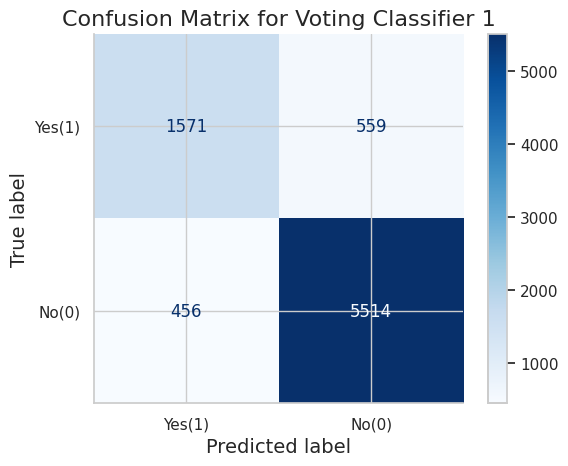

0.8305883879491354


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_final_pred = voting_clf1.predict(x_test_1)
print(classification_report(y_test_1, y_final_pred))

# Compute confusion matrix
confusion_mat = confusion_matrix(y_test_1, y_final_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=['Yes(1)', 'No(0)'])

# Customize the plot style and size
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Plot the confusion matrix
disp.plot(cmap='Blues')

# Customize the plot
plt.title('Confusion Matrix for Voting Classifier 1', fontsize=16)
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)

# Remove the top and right spines
sns.despine(top=True, right=True)

# Show the plot
plt.show()

# Calculate AUC-ROC score
AUC_ROC = roc_auc_score(y_test_1, y_final_pred)
print(AUC_ROC)


              precision    recall  f1-score   support

           0       0.99      0.83      0.91      8378
           1       0.29      0.94      0.45       622

    accuracy                           0.84      9000
   macro avg       0.64      0.89      0.68      9000
weighted avg       0.95      0.84      0.87      9000



<Figure size 800x600 with 0 Axes>

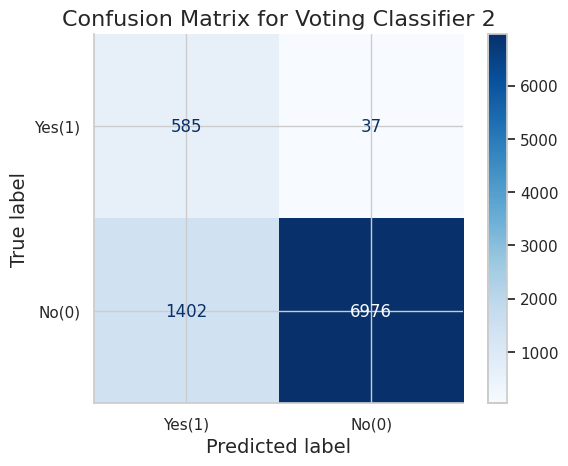

0.8865857140773684


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_final_pred = voting_clf2.predict(x_test_2)
print(classification_report(y_test_2, y_final_pred))

# Compute confusion matrix
confusion_mat = confusion_matrix(y_test_2, y_final_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=['Yes(1)', 'No(0)'])

# Customize the plot style and size
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Plot the confusion matrix
disp.plot(cmap='Blues')

# Customize the plot
plt.title('Confusion Matrix for Voting Classifier 2', fontsize=16)
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)

# Remove the top and right spines
sns.despine(top=True, right=True)

# Show the plot
plt.show()

# Calculate AUC-ROC score
AUC_ROC = roc_auc_score(y_test_2, y_final_pred)
print(AUC_ROC)


># **8- Conclusion**
---

Based on the project at hand, there exist a few insights that could be of significant value to the stakeholders:

***Demographics of the intended audience:*** The project findings indicate a disparity in the click rates between the male and female users. To increase ad relevancy and click-through rates, it would be advisable for the stakeholders to personalize their advertisement campaigns according to the gender of the target audience. This strategy has the potential to enhance engagement rates and possibly lead to higher conversion rates.

***Favored products and campaigns:*** The exploratory data analysis highlights that certain products and campaigns garner higher click rates than others. Armed with this knowledge, the stakeholders can prioritize and channel their marketing resources towards the products and campaigns that have a higher chance of eliciting clicks and conversions. This approach can optimize the allocation of marketing resources and potentially increase the overall return on investment (ROI).

***The Importance of data-driven decision-making:*** The project serves as an excellent demonstration of the efficacy of using data and machine learning models to accurately predict click-through rates. It is crucial for stakeholders to appreciate the immense value that data-driven insights can offer in informing their marketing strategies and making informed decisions about ad placements, targeting, and budget allocation.

***Performance of the model and areas for improvement:*** The juxtaposition of different classification models and the application of the voting classifier showcases the significance of selecting the best model for predicting click-through rates. The stakeholders ought to be mindful of the model's performance and continuously seek avenues for improvements to maintain or increase the accuracy of click-through rate (CTR) predictions. This move would ensure that their marketing efforts are optimized over time.

***Management of imbalanced data:*** The project provides a valuable lesson on the impact of imbalanced data on the performance of a model and the criticality of employing techniques like SMOTE to address the issue. The stakeholders must remain alert to the possibility of data imbalance in their datasets and adopt measures to ensure that their models are adequately trained and evaluated.

By fully grasping and acting on these insights, the stakeholders can fine-tune their advertising campaigns, tailor their focus on the appropriate demographics, and harness their marketing resources to their advantage. Ultimately, this could lead to a rise in click-through rates, better customer engagement, and an overall increase in the ROI of their marketing efforts.

># **9- References**
---

https://www.kaggle.com/datasets/arashnic/ctr-in-advertisement

https://towardsdatascience.com/best-practices-in-ml-observability-for-click-through-rate-models-8a0c6755a49a